<a href="https://colab.research.google.com/github/akieres/COVID-19/blob/master/resize_antialiasing_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision.transforms.functional as F
from torchvision.transforms.functional import InterpolationMode
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from skimage import draw

Unique values of image: [0. 1.]
float64


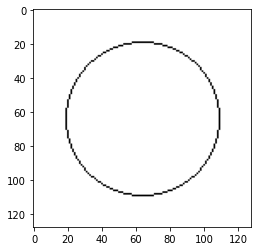

In [ ]:
# create a simple image
image = np.ones((128, 128), dtype=np.float)
rr, cc = draw.circle_perimeter(64, 64, radius=45, shape=image.shape)
image[rr, cc] = 0
plt.imshow(image, cmap='gray')
print(f"Unique values of image: {np.unique(arr)}")
print(image.dtype)

In [ ]:
output_size = 17

def inspect_img(*, img):
    plt.imshow(img, cmap='gray')
    print(f"Unique values of image: {np.unique(img)}")
    print(f"Image size:{img.shape}, type:{img.dtype}")
    print(f"Value of pixel with coordinates (14,9): {img[14, 9]}")

**PIL**

Unique values of image: [0.86737263 0.8673727  0.86789775 0.8678978  0.86848116 0.8684812
 0.86866796 0.868668   0.87534827 0.8754404  0.87706774 0.8779811
 0.8817612  0.888297   0.8911121  0.8939335  0.89835936 0.9075361
 0.9122274  0.9174649  0.9206731  0.92465234 0.92945355 0.9329934
 0.9329935  0.9367291  0.93843377 0.9521789  0.953724   0.96227986
 0.9655739  0.97587633 0.9791388  0.9827626  0.9832467  0.99086547
 0.9937731  0.9952382  0.9960673  0.99755865 0.9990072  0.99971837
 0.99974865 0.9997499  0.999801   0.9998471  0.99988335 0.99989295
 0.9999179  0.99992037 0.9999366  0.99994934 0.9999499  0.9999807
 0.999981   0.9999948  0.99999505 0.9999952  0.99999565 0.99999934
 1.         1.0000386  1.000055   1.0001318  1.0001361  1.0001363
 1.0001637  1.00028    1.0002801  1.0003477  1.000352   1.0009085
 1.0012629  1.0014951  1.0016173  1.0020118  1.0020894  1.0021822
 1.0028547  1.0028888  1.0037526  1.0039469  1.0045916  1.0046595
 1.0048798  1.0051284  1.0059301  1.0064806  1.

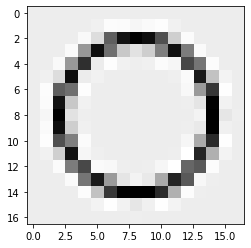

In [ ]:
def resize_PIL(*, img, output_size):
    img = Image.fromarray(image)
    img = img.resize((output_size, output_size), resample=Image.BICUBIC)
    img = np.asarray(img)
    inspect_img(img=img)
    return img

image_PIL = resize_PIL(img=image, output_size=output_size)

**PyTorch**

Unique values of image: [0.19318008 0.64267632 0.64267632 0.652017   0.652017   0.79720425
 0.79720425 0.85719447 0.98803224 0.9956679  0.9956679  1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.0072451  1.0072451
 1.01540794 1.02304373 1.02304373 1.05310528 1.06163413]
Image size:(17, 17), type:float64
Value of pixel with coordinates (14,9): 0.6520169969853261


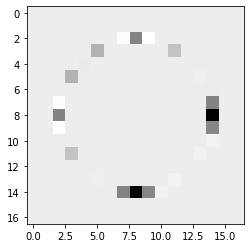

In [ ]:
def resize_pytorch(*, img, output_size):
    img = F.resize(torch.from_numpy(img).unsqueeze(0), size=output_size, interpolation=InterpolationMode.BICUBIC)
    img = img[0, ...].cpu().data.numpy()
    inspect_img(img=img)
    return img

image_pytorch = resize_pytorch(img=image, output_size=output_size)

**TensorFlow**

Unique values of image: [0.2105526  0.680069   0.6800691  0.68654966 0.8380833  0.8380834
 0.8860934  0.994684   0.998076   0.9980761  0.9999997  0.99999976
 0.9999998  0.9999999  0.99999994 1.         1.0055469  1.0100365
 1.0100366  1.0150955  1.0353556  1.0353557  1.0402596 ]
Image size:(17, 17), type:float32
Value of pixel with coordinates (14,9): 0.6865496635437012


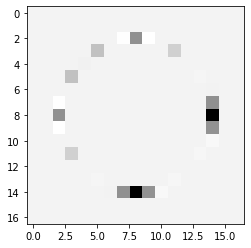

In [ ]:
def resize_tensorflow(*, img, output_size):
    img = img[tf.newaxis, ..., tf.newaxis]
    img = tf.image.resize(img, size=[output_size, output_size], method="bicubic")
    img = img[0, ..., 0].numpy()
    inspect_img(img=img)
    return img

image_tensorflow = resize_tensorflow(img=image, output_size=output_size)

**OpenCV**

Unique values of image: [0.19318295 0.64267278 0.64267528 0.65201321 0.79720571 0.85719495
 0.98803226 0.99566787 1.         1.00724495 1.01540753 1.02304393
 1.05310535 1.06163413]
Image size:(17, 17), type:float64
Value of pixel with coordinates (14,9): 0.6520132147719551


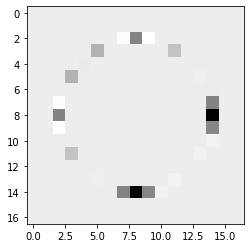

In [ ]:
def resize_opencv(*, img, output_size):
    img = cv2.resize(img, (output_size, output_size), interpolation=cv2.INTER_CUBIC)
    inspect_img(img=img)
    return img

image_opencv = resize_opencv(img=image, output_size=output_size)

In [ ]:
# Are pixel values equal?
print((image_PIL == image_pytorch).all())
print((image_PIL == image_tensorflow).all())
print((image_PIL == image_opencv).all())
print((image_pytorch == image_tensorflow).all())
print((image_pytorch == image_opencv).all())
print((image_tensorflow == image_opencv).all())

False
False
False
False
False
False


In [ ]:
# Are pixel values close?
print(np.isclose(image_PIL, image_pytorch).all())
print(np.isclose(image_PIL, image_tensorflow).all())
print(np.isclose(image_PIL, image_opencv).all())
print(np.isclose(image_pytorch, image_tensorflow).all())
print(np.isclose(image_pytorch, image_opencv).all())
print(np.isclose(image_tensorflow, image_opencv).all())

False
False
False
False
False
False
